In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

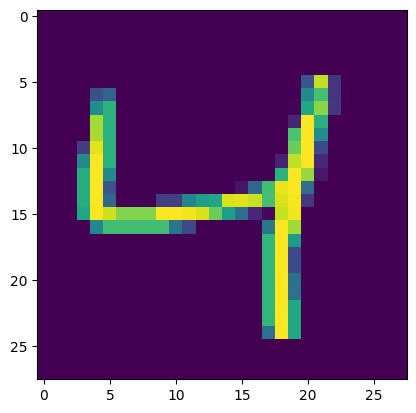

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2783 - accuracy: 0.9174 - val_loss: 0.1435 - val_accuracy: 0.9593
Epoch 2/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1182 - accuracy: 0.9649 - val_loss: 0.1229 - val_accuracy: 0.9638
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0814 - accuracy: 0.9749 - val_loss: 0.1041 - val_accuracy: 0.9691
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 0.0985 - val_accuracy: 0.9710
Epoch 5/25
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0473 - accuracy: 0.9851 - val_loss: 0.0934 - val_accuracy: 0.9731
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.1050 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.1027 - val_accur

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9759

In [ ]:
from google.colab import files

# Upload files interactively
uploaded = files.upload()



Saving R.png to R.png


1/1 [==============================] - 0s 65ms/step


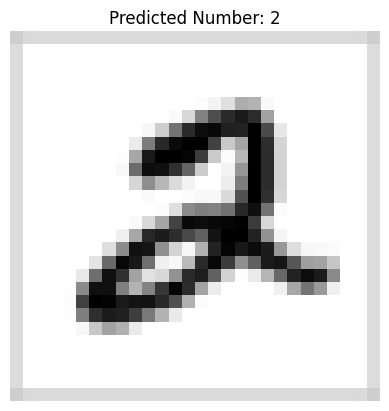

In [ ]:

# Function to predict number from an image
def predict_number(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((28, 28))  # Resize the image to match the input shape of the model
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = img_array.reshape(1, 28, 28)  # Reshape for model input

    # Predict the number using the model
    prediction = model.predict(img_array)
    predicted_number = prediction.argmax()

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Number: {predicted_number}")
    plt.axis('off')
    plt.show()

# Path to the new image
new_image_path = 'R.png'

# Predict the number from the new image
predict_number(new_image_path)
